# Exploratory Notebook

In [90]:
#importing relevant libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3


## Loading the Data sets

In [96]:
#going through SQl
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())


dict_keys(['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers'])


In [118]:
#cleaning principals column
principals_1 = imdb_tables["principals"]
principals_1

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,unknown,"[""The Man""]"
1,tt0111414,2,nm0398271,director,unknown,unknown
2,tt0111414,3,nm3739909,producer,producer,unknown
3,tt0323808,10,nm0059247,editor,unknown,unknown
4,tt0323808,1,nm3579312,actress,unknown,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,unknown,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,unknown,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,unknown,unknown
1028184,tt9692684,4,nm6009913,writer,writer,unknown


In [119]:
#checking the first rows
principals_1.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,unknown,"[""The Man""]"
1,tt0111414,2,nm0398271,director,unknown,unknown
2,tt0111414,3,nm3739909,producer,producer,unknown
3,tt0323808,10,nm0059247,editor,unknown,unknown
4,tt0323808,1,nm3579312,actress,unknown,"[""Beth Boothby""]"


In [106]:
#checking on culmns
principals_1.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters'], dtype='object')

In [107]:
#summary
principals_1.describe()

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [104]:
principals_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [108]:
#checking on duplicates
principals_1.duplicated().sum()

0

In [109]:
#checking on the missing values
principals_1.isnull().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

In [110]:
#filling on the missing values on job col
principals_1['job'].fillna('unknown',inplace = True)
principals_1.isnull().sum() 

C:\Users\User\AppData\Local\Temp\ipykernel_16816\3038162623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  principals_1['job'].fillna('unknown',inplace = True)


movie_id           0
ordering           0
person_id          0
category           0
job                0
characters    634826
dtype: int64

In [114]:
#filling missing values on characters col
principals_1['characters'].fillna('unknown',inplace = True)
principals_1.isnull().sum() 

movie_id      0
ordering      0
person_id     0
category      0
job           0
characters    0
dtype: int64

In [ ]:
bom_movie = pd.read_csv("../Data/bom.movie_gross.csv")
rt_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
rt_reviews = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
tmdb_df = pd.read_csv("../Data/tmdb.movies.csv")
tn_budget = pd.read_csv("../Data/tn.movie_budgets.csv")

## bom_movie data cleaning

In [74]:
# checking the first rows
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [75]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [76]:
#checking  on columns
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [77]:
#summary
bom_movie.describe( include='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [78]:
#checking on duplicates
bom_movie.duplicated().sum()

0

In [79]:
#checking on null values
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [80]:
#filling the null values on studio col
bom_movie['studio'].fillna('unknown', inplace=True)
bom_movie.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_16816\1925145961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_movie['studio'].fillna('unknown', inplace=True)


title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

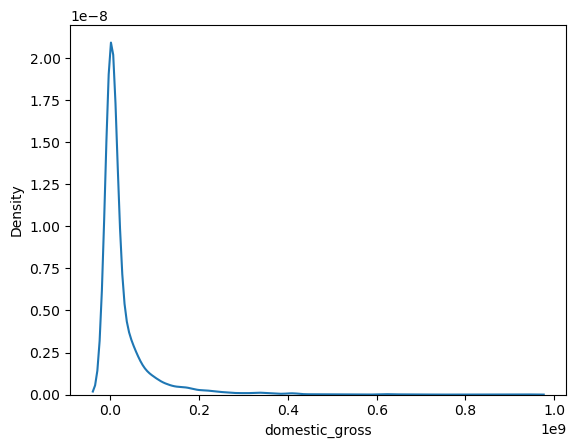

In [81]:
#Using median to impute null values on domestic-gross col
bom_movie['domestic_gross'].skew()
sns.kdeplot(bom_movie['domestic_gross']);


In [82]:
median_dom_gross = bom_movie.domestic_gross.median()
bom_movie['domestic_gross'].fillna(median_dom_gross, inplace=True)
bom_movie.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_16816\803217335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_movie['domestic_gross'].fillna(median_dom_gross, inplace=True)


title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [83]:
# Coverting foreign gross object column into Float
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')
bom_movie['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

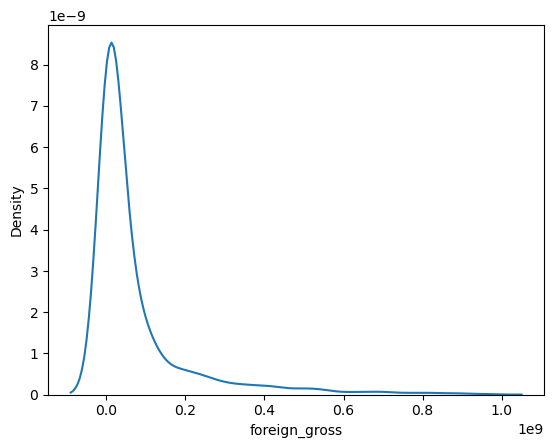

In [84]:
#using median to impute null values on foreign-gross col
bom_movie['foreign_gross'].skew()
sns.kdeplot(bom_movie['foreign_gross']);

In [85]:
#filling null values on foreign_gross col
median_foreign_gross = bom_movie.foreign_gross.median()
bom_movie['foreign_gross'].fillna(median_foreign_gross, inplace=True)
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [86]:
#feature engineering
bom_movie['total_gross'] = bom_movie['domestic_gross'] + bom_movie['foreign_gross'] 
#print(bom_movie[['year', 'total_gross']].head())
bom_movie[['total_gross']]  


,total_gross
0,1.067000e+09
1,1.025500e+09
2,9.603000e+08
3,8.283000e+08
4,7.526000e+08
...,...
3382,1.890620e+07
3383,1.890480e+07
3384,1.890250e+07
3385,1.890240e+07


In [87]:
#checking columns
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')